In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load the dataset
data = pd.read_csv("D:\\final\\features_3_sec.csv")


In [5]:
# Extract features and labels
X = data.iloc[:, 1:-1].values
y = data.iloc[:, -1].values
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [7]:
# Train the KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Make predictions using the KNN model
y_pred_knn = knn.predict(X_test)

# Evaluate the KNN model
print("KNN Model Evaluation:")
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))
print("Accuracy:", accuracy_score(y_test, y_pred_knn))


KNN Model Evaluation:
[[189   0   3   1   2   8   0   0   4   1]
 [  0 195   1   0   0   7   0   0   0   0]
 [  7   3 159   7   1   2   0   2   4   1]
 [  2   3   1 181   2   2   0   3   0   5]
 [  0   0   5   4 195   1   0   7   5   1]
 [  5  15   6   0   0 165   0   1   0   0]
 [  0   0   0   2   1   0 198   0   0   3]
 [  0   2   4   5   3   0   0 163   2   1]
 [  1   1   3   3   4   1   0   2 196   0]
 [  4   1   8  12   2   0   3   0   6 161]]
              precision    recall  f1-score   support

       blues       0.91      0.91      0.91       208
   classical       0.89      0.96      0.92       203
     country       0.84      0.85      0.85       186
       disco       0.84      0.91      0.87       199
      hiphop       0.93      0.89      0.91       218
        jazz       0.89      0.86      0.87       192
       metal       0.99      0.97      0.98       204
         pop       0.92      0.91      0.91       180
      reggae       0.90      0.93      0.92       211
      

In [8]:
# Train the SVM model
svm = SVC(kernel='linear', C=1)
svm.fit(X_train, y_train)

# Make predictions using the SVM model
y_pred_svm = svm.predict(X_test)

# Evaluate the SVM model
print("SVM Model Evaluation:")
print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))
print("Accuracy:", accuracy_score(y_test, y_pred_svm))


SVM Model Evaluation:
[[165   1  11   4   1   5   6   0   8   7]
 [  2 193   2   0   0   6   0   0   0   0]
 [ 18   2 134   8   1   5   0   3   0  15]
 [  4   4   8 140  10   3   4   6  10  10]
 [  9   1  11  11 165   0   1   7  12   1]
 [  6  10   7   3   0 164   0   0   1   1]
 [  5   0   1   4   2   0 178   0   0  14]
 [  0   0   5   5   7   1   0 158   3   1]
 [  8   1  10   9  22   3   5   8 136   9]
 [ 12   2  18  21   3   5  14   8   5 109]]
              precision    recall  f1-score   support

       blues       0.72      0.79      0.76       208
   classical       0.90      0.95      0.93       203
     country       0.65      0.72      0.68       186
       disco       0.68      0.70      0.69       199
      hiphop       0.78      0.76      0.77       218
        jazz       0.85      0.85      0.85       192
       metal       0.86      0.87      0.86       204
         pop       0.83      0.88      0.85       180
      reggae       0.78      0.64      0.70       211
      

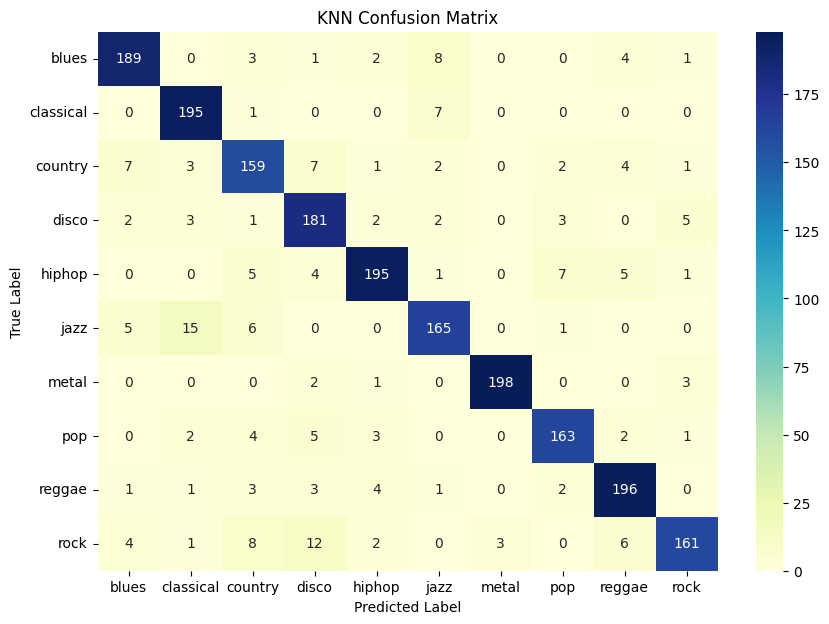

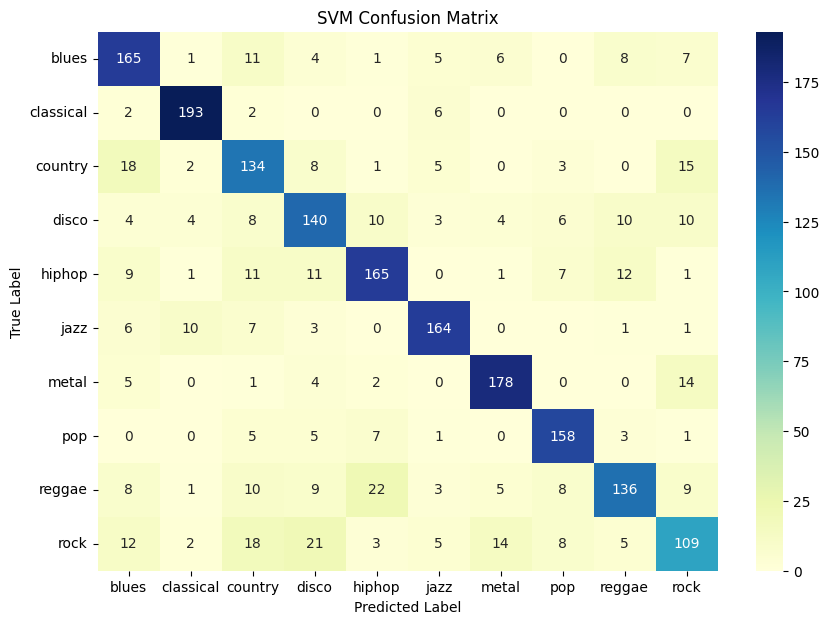

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion_matrix_heatmap(y_true, y_pred, title, labels):
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    df_cm = pd.DataFrame(cm, index=labels, columns=labels)
    
    plt.figure(figsize=(10,7))
    sns.heatmap(df_cm, annot=True, cmap="YlGnBu", fmt='d')
    plt.title(title)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

# Get the unique labels
labels = np.unique(y)

# Plot confusion matrix heatmaps
plot_confusion_matrix_heatmap(y_test, y_pred_knn, "KNN Confusion Matrix", labels)
plot_confusion_matrix_heatmap(y_test, y_pred_svm, "SVM Confusion Matrix", labels)
